<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MFTI_Kaggle/train.csv')

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.iloc[50:53,:]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
50,3,29.75,96.85,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,0
51,1,74.45,74.45,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1
52,68,102.10,7149.35,Male,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,No,Yes,Two year,Yes,Bank transfer (automatic),0


In [ ]:
data.info() # колонка TotalSpent имеет тип object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
# преобразуем колонка TotalSpent в тип float
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

In [ ]:
data.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                  float64
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [ ]:
data.describe(include = 'number')

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5273.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2291.390461,0.159409,0.262022
std,24.550326,30.176464,2269.014233,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,401.100000,0.000000,0.000000
50%,29.000000,70.400000,1410.250000,0.000000,0.000000
75%,55.000000,90.050000,3807.350000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


In [ ]:
data.describe(include = 'object')

,Sex,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
count,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282,5282
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,2655,2705,3676,4761,2511,2341,2612,2332,2317,2604,2099,2081,2920,3148,1786


In [ ]:
# Посмотрим на наличие пропущенных значений
data.isna().sum()
# в датасете есть пропущенные значения в TotalSpent                  

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [ ]:
data.dropna(inplace=True) # исключим пропущенные данные

In [ ]:
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].apply(lambda x: 'Yes' if x ==1 else 'No')

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
pd.concat([X, y], axis=1).corr().iloc[::,-1]

ClientPeriod                                   -0.056987
MonthlySpending                                 0.037320
TotalSpent                                     -0.035306
Sex_Female                                      0.009467
Sex_Male                                       -0.009467
IsSeniorCitizen_No                             -0.023079
IsSeniorCitizen_Yes                             0.023079
HasPartner_No                                   0.037681
HasPartner_Yes                                 -0.037681
HasChild_No                                     0.032922
HasChild_Yes                                   -0.032922
HasPhoneService_No                              0.013299
HasPhoneService_Yes                            -0.013299
HasMultiplePhoneNumbers_No                     -0.019767
HasMultiplePhoneNumbers_No phone service        0.013299
HasMultiplePhoneNumbers_Yes                     0.011959
HasInternetService_DSL                         -0.017370
HasInternetService_Fiber optic 

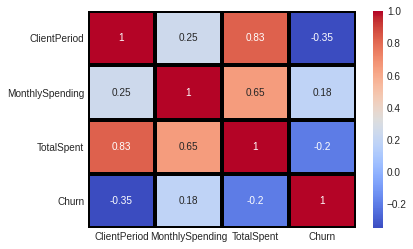

In [ ]:
# Построим heatmap для оценки корреляции численных данных
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm', linewidths=3, linecolor='black')

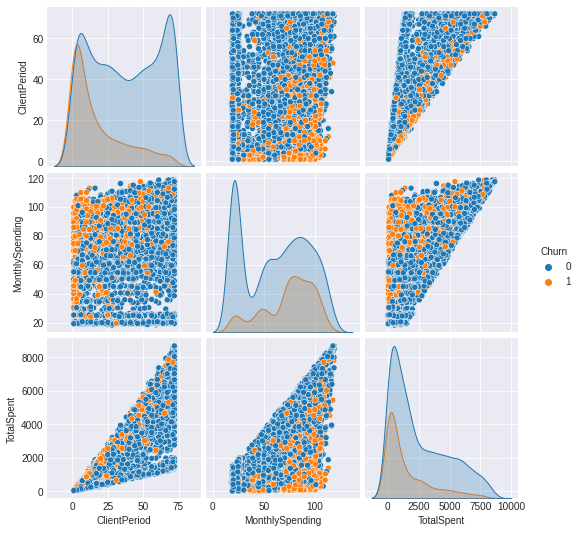

In [ ]:
# Построим pairplot для оценки отношения между всеми парами численных признаков 
sns.pairplot(data, hue='Churn')

plt.show()

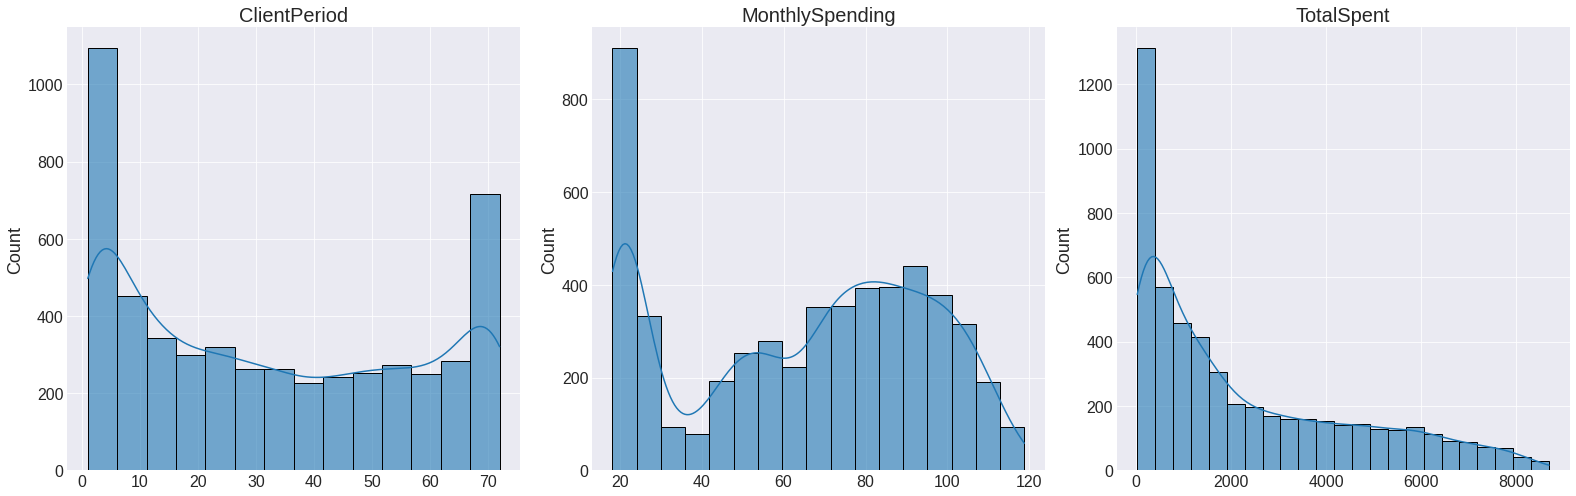

In [ ]:
# Построим гистограммы для численных признаков
f,ax = plt.subplots(1, 3, figsize=(22,7))
for i, col in enumerate(num_cols):
    sns.histplot(x=col, data=data, alpha=0.6, kde=True, ax=ax[i])
    ax[i].set_title(col, fontsize=20)
    ax[i].set_xlabel(None)
    ax[i].set_ylabel('Count', fontsize=18)
    ax[i].tick_params(labelsize=16)
plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()


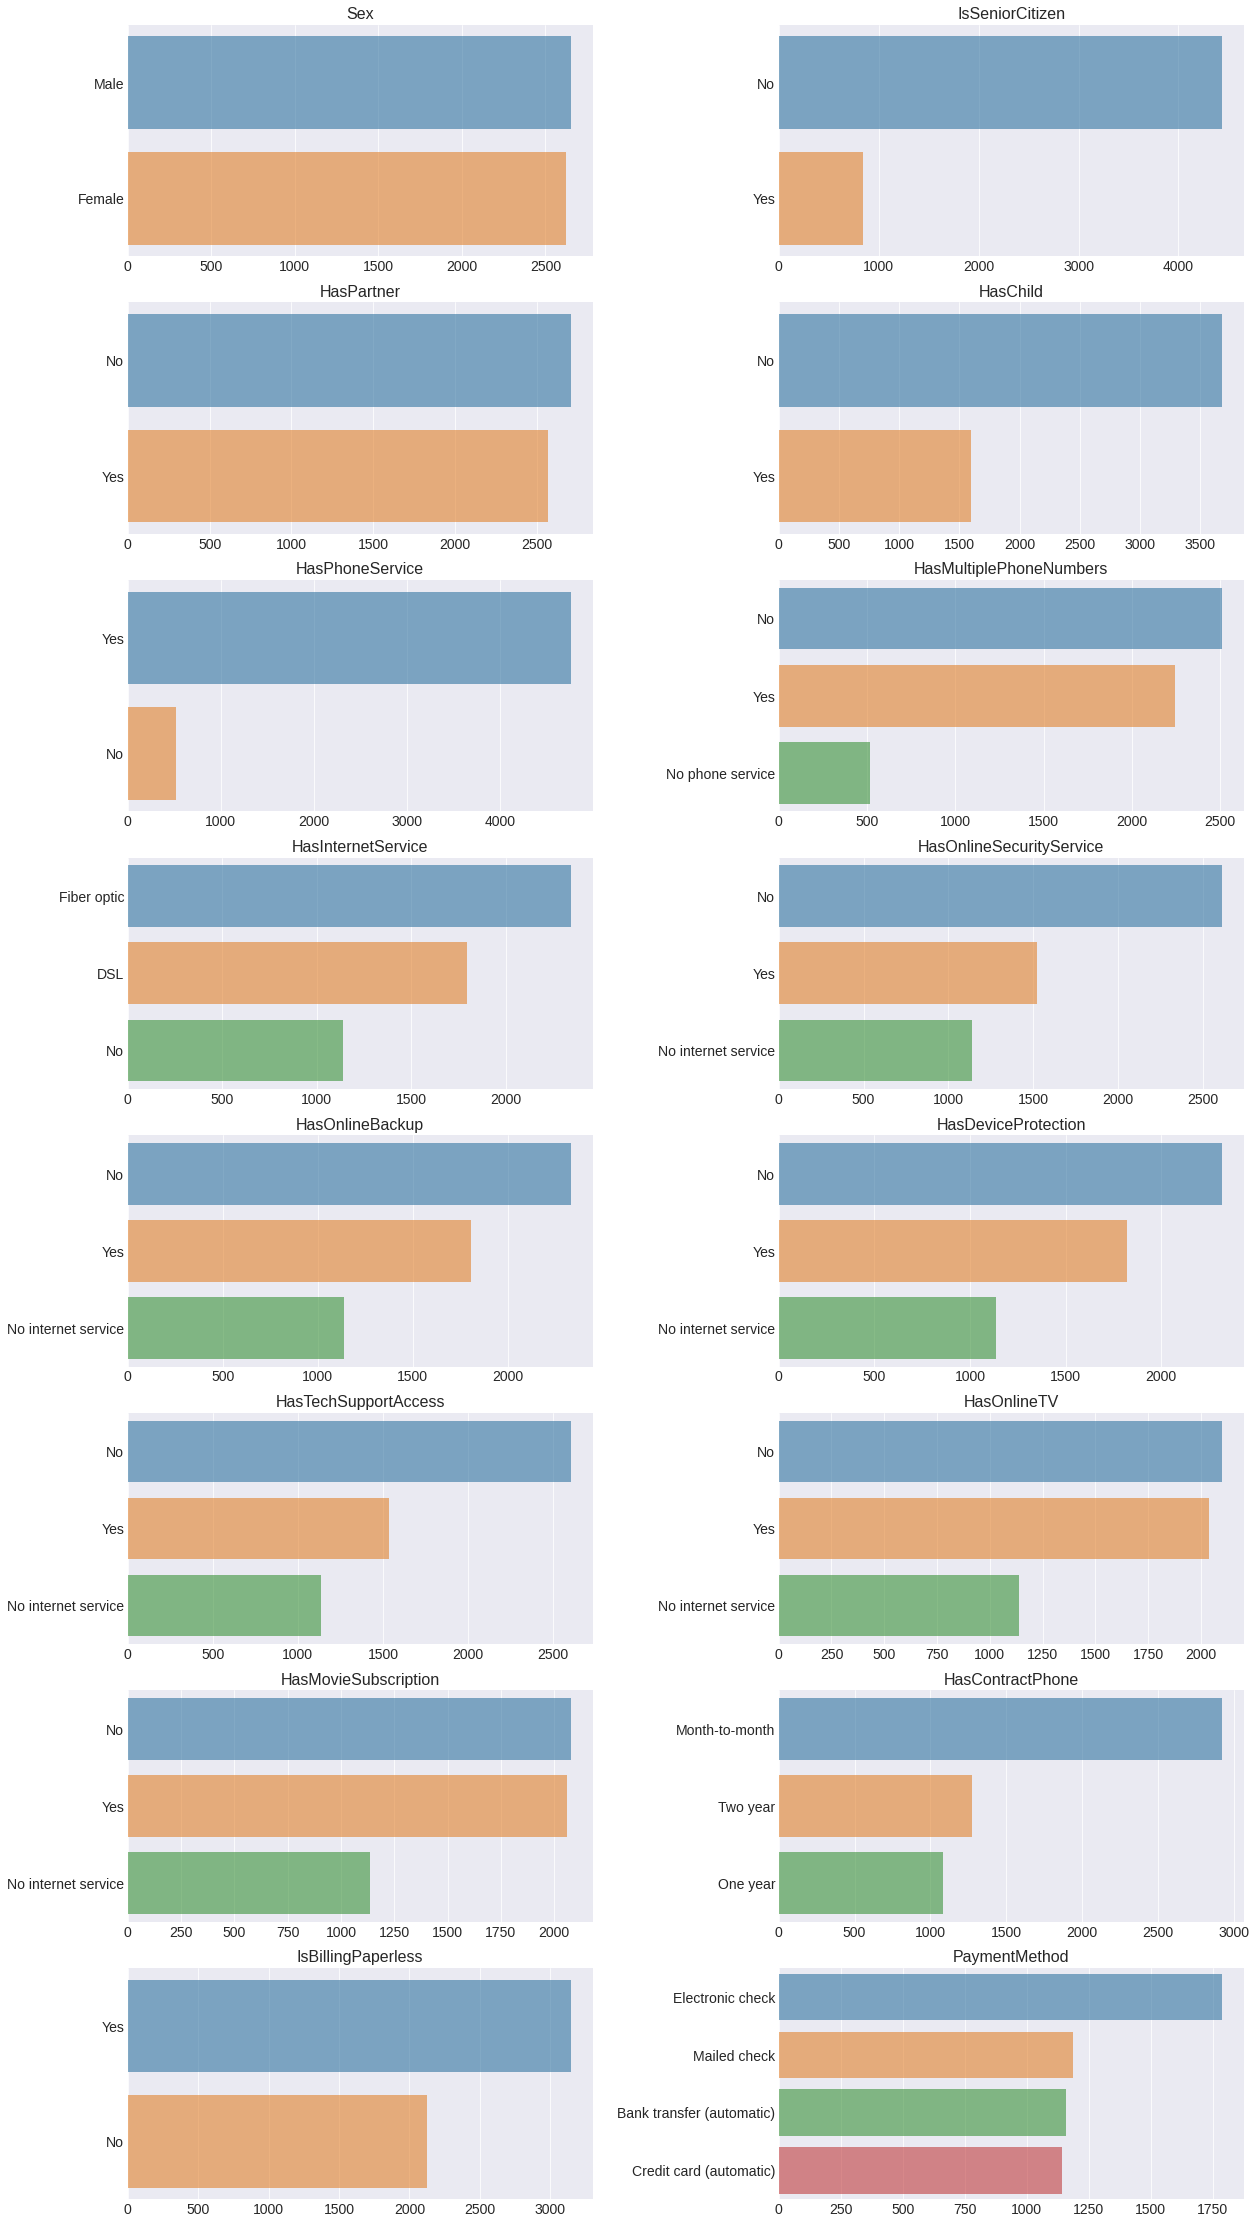

In [ ]:
# Построим гистограммы для категориальных признаков
f,ax = plt.subplots(8, 2, figsize=(20,40))
for ax, col in zip(ax.ravel(), cat_cols):
    dat = data[col].value_counts()
    sns.barplot(y=dat.index, x=dat.values, alpha=0.6, ax=ax)
    ax.set_title(col, fontsize=16)
    ax.tick_params(labelsize=14)
plt.subplots_adjust(wspace=0.4, hspace=0.2)

**Оценим в каких фичах преобладает тот или иной пол.**


In [ ]:
# оценим гендерная структуру по наличию детей
data_has_child = data.groupby(['HasChild', 'Sex'])['Sex'].count()\
    .groupby('HasChild').apply(lambda x: 100 * x / x.sum()).unstack('Sex')\
    .sort_values(by=['Female', 'Male'])


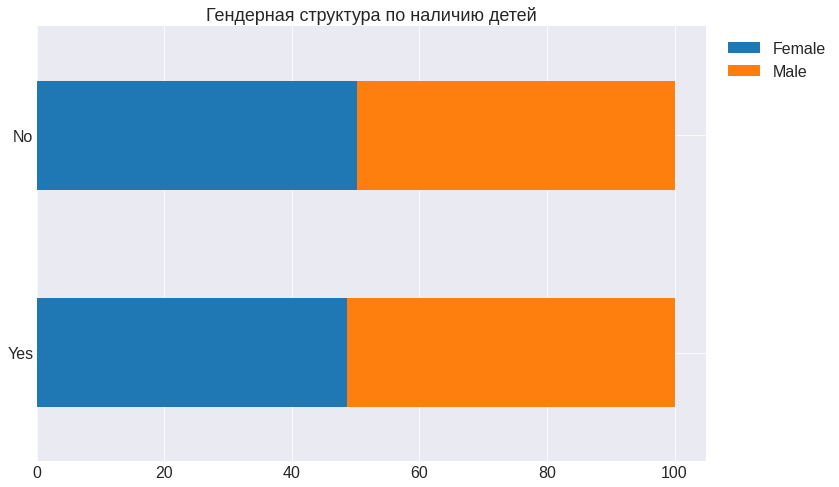

In [ ]:
plot = data_has_child.plot.barh(
        figsize=(12,8)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура по наличию детей')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**Примерно одинаковое количество мужчин и женщин имеют/не имеют детей**

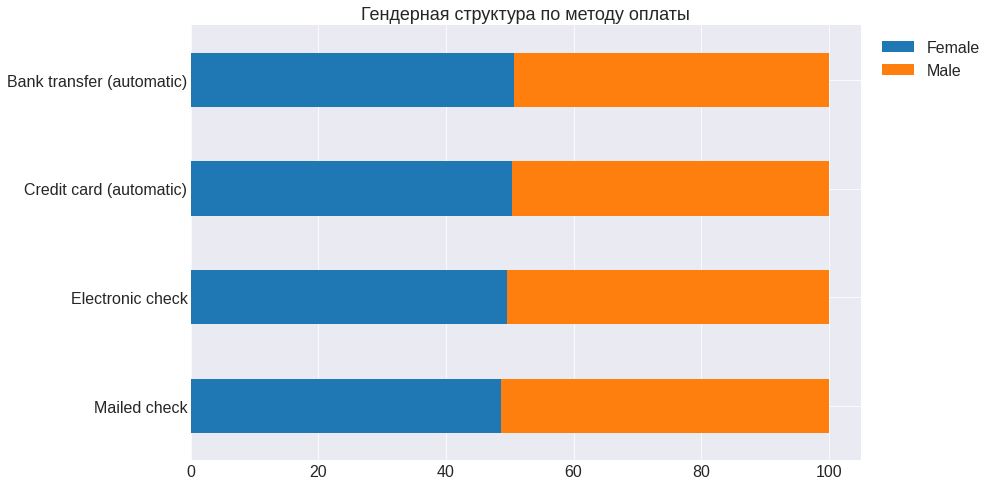

In [ ]:
# оценим гендерную структуру по методу оплаты
data_PaymentMethod = data.groupby(['PaymentMethod', 'Sex'])['Sex'].count()\
    .groupby('PaymentMethod').apply(lambda x: 100 * x / x.sum()).unstack('Sex')\
    .sort_values(by=['Female', 'Male'])

plot = data_PaymentMethod.plot.barh(
        figsize=(12,8)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура по методу оплаты')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**Примерно одинаковое количество мужчин и женщин пользуются различными методами платежа**

**Оценим распределение целевой переменной**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


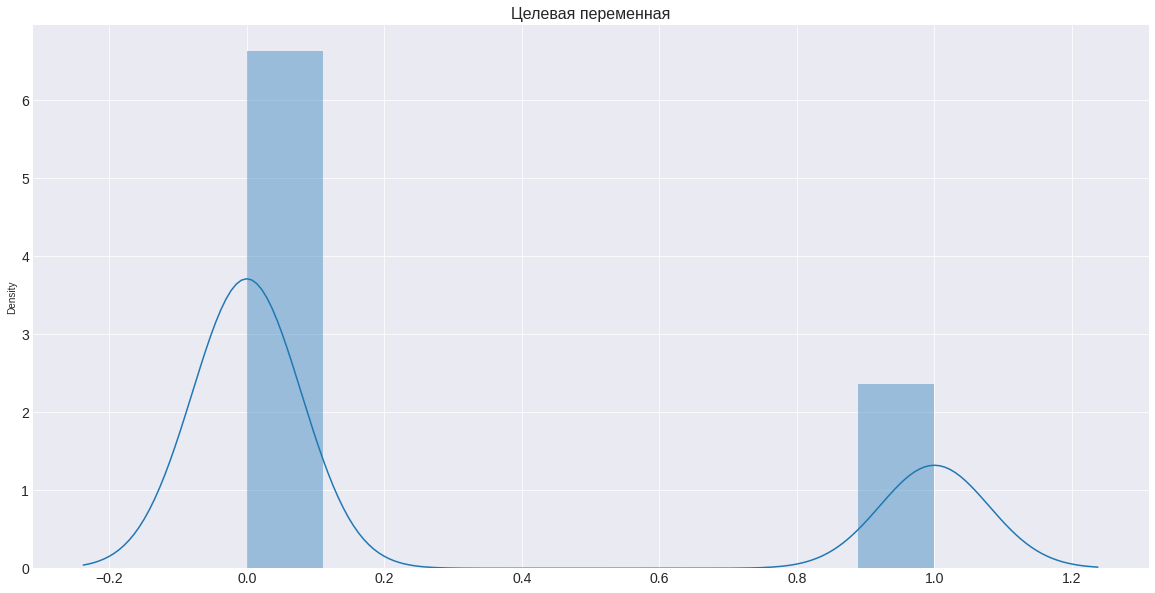

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Целевая переменная", fontsize=16)
plt.tick_params(labelsize=14)
sns.distplot(data['Churn'], axlabel=False)
plt.show()

**Видно, что классы не являются несбалансированными, количество отличается примерно в 3 раза**

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
numeric_data = data[num_cols]
numeric_data.head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


In [ ]:
categorical_data = data[cat_cols]
categorical_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [ ]:
# le = LabelEncoder()
# # применим le к колонкам с категориальными данными
# categorical_data = categorical_data.apply(lambda col: le.fit_transform(col))    

In [ ]:
ohe = OneHotEncoder()
#One-hot-encode применим к категориальным данным.
array_hot_encoded = ohe.fit_transform(categorical_data).toarray()

#Преобразуем полученный результат в датафрейм
cat_dat_enc = pd.DataFrame(array_hot_encoded, index=data.index, columns=ohe.get_feature_names(cat_cols))

cat_dat_enc.reset_index(drop=True, inplace=True)
cat_dat_enc.head()

# думаю, что проще, конечно, через pd.get_gummies

,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
numeric_data.reset_index(drop=True, inplace=True)

In [ ]:
# объединим численные и категориальные данные
X = pd.concat([numeric_data, cat_dat_enc], axis=1)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,IsSeniorCitizen_No,IsSeniorCitizen_Yes,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,72,25.85,1872.20,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,75.90,75.90,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,32,79.30,2570.00,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,115.25,6758.45,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y = data[target_col]
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Churn, dtype: int64

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
# разделим выборку на train и test
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [ ]:
# пронормируем признаки
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# обучим модель логистической регрессии
clf = LogisticRegressionCV(scoring='roc_auc', refit=True).fit(X_train_scaled, y_train)


In [ ]:
clf.sparsify()
# лучший коэффициент С = 10

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
# получим предсказанные данные
y_train_predicted = clf.predict_proba(X_train_scaled)[:,1]
y_test_predicted = clf.predict_proba(X_test_scaled)[:,1]

In [ ]:
def roc_auc_print(y_train, y_train_predicted, y_test, y_test_predicted):
    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)
    plt.figure(figsize=(10,7))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

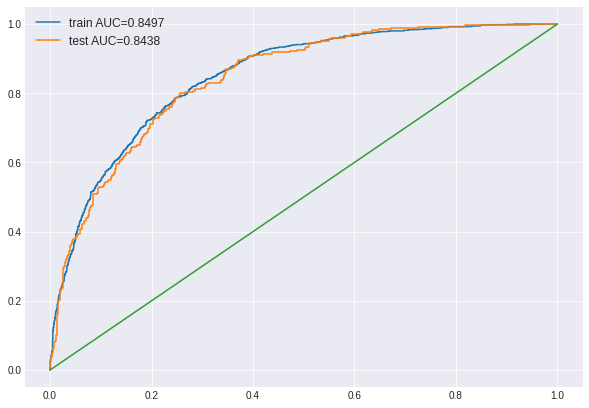

In [ ]:
# оценим полученные данные с помощью roc_auc_score
roc_auc_print(y_train, y_train_predicted, y_test, y_test_predicted)

In [ ]:
# проверим с помощью функции, использованной на семинаре
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=parameters,
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()
        
    return CV_model

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0699s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.8s finished


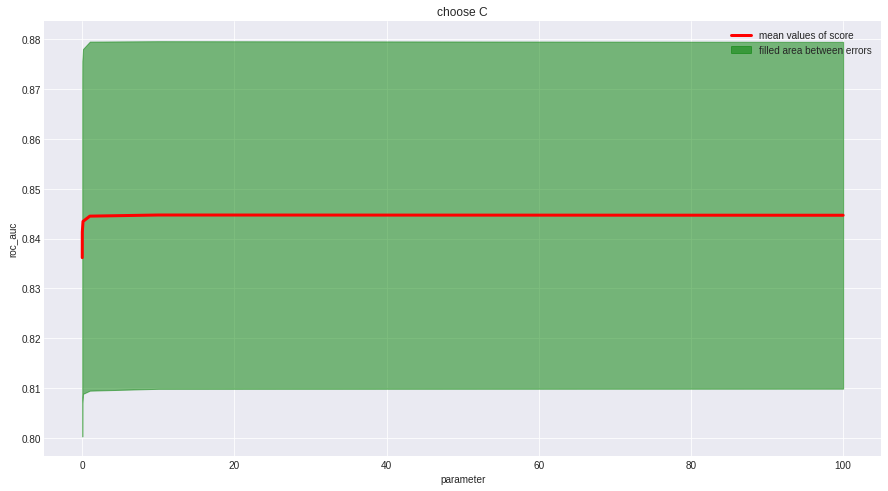

In [ ]:
CV_model = search_and_draw(X_train_scaled, y_train, LogisticRegression(), 'C', 
                np.array([100, 10, 1, 0.1, 0.01, 0.001]));

In [ ]:
y_train_predicted_CV = CV_model.predict_proba(X_train_scaled)[:,1]
y_test_predicted_CV = CV_model.predict_proba(X_test_scaled)[:,1]

In [ ]:
train_auc_CV = roc_auc_score(y_train, y_train_predicted_CV) 
test_auc_CV = roc_auc_score(y_test, y_test_predicted_CV)
print(f'Результат для GridSearchCV: \ntrain_auc = {round(train_auc_CV,3)}, \ntest_auc = {round(test_auc_CV, 3)}')

Результат для GridSearchCV: 
train_auc = 0.85, 
test_auc = 0.844


In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'Результат для LogisticRegressionCV: \ntrain_auc = {round(train_auc,3)}, \ntest_auc = {round(test_auc, 3)}')

Результат для LogisticRegressionCV: 
train_auc = 0.85, 
test_auc = 0.844


In [ ]:
CV_model.best_params_ # параметр С в GridSearchCV

{'C': 10.0}

In [ ]:
clf.Cs # параметр С в LogisticRegressionCV

10

**Результат, полученный c помощью LogisticRegressionCV совпал с результом GridSearchCV.**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [ ]:
import catboost 

In [ ]:
X_origin = data.iloc[:,:-1]

In [ ]:
X_origin.head() # оригинальная выборка

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,No,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,No,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,No,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,No,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [ ]:
# Разделим выборку на train и test
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.9, 
                                                       random_state=42)

In [ ]:
cat_indices = np.arange(3, 19)

In [ ]:
# обучим модель catboost с дефолтными параметрами
boosting_model = catboost.CatBoostClassifier(cat_features=cat_indices)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted_cat = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted_cat = boosting_model.predict_proba(X_test_origin)[:, 1]

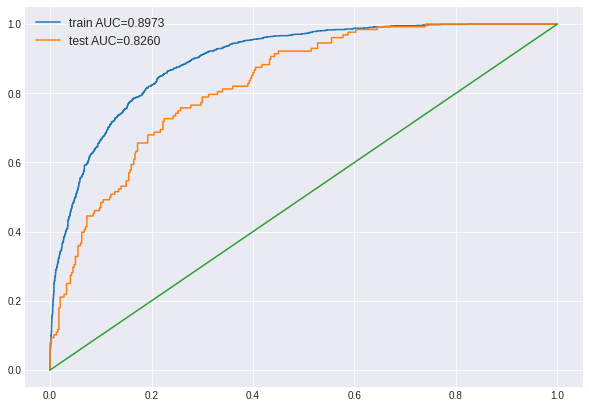

In [ ]:
# определим roc_auc_score 
roc_auc_print(y_train, y_train_predicted_cat, y_test, y_test_predicted_cat)

In [ ]:
# Найдем наилучшие параметры модели catboost с помощью GridSearchCV
CV_model_cat = GridSearchCV(estimator=catboost.CatBoostClassifier(cat_features=cat_indices), 
                            param_grid={'n_estimators': np.array([100, 200, 500]),
                                        'depth': np.array([2, 3]), 
                                        'learning_rate': np.array([0.05, 0.08, 0.1, 0.5, 1, 2])},
                            cv=5, 
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10)
CV_model_cat.fit(X_train_origin, y_train)

y_train_predicted_cat_CV = CV_model_cat.predict_proba(X_train_origin)[:, 1]
y_test_predicted_cat_CV = CV_model_cat.predict_proba(X_test_origin)[:, 1]

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   44.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  3

0:	learn: 0.6561478	total: 6.06ms	remaining: 1.21s
1:	learn: 0.6268432	total: 12ms	remaining: 1.19s
2:	learn: 0.6010228	total: 17.5ms	remaining: 1.15s
3:	learn: 0.5851253	total: 22.7ms	remaining: 1.11s
4:	learn: 0.5683829	total: 27.3ms	remaining: 1.07s
5:	learn: 0.5534779	total: 32.4ms	remaining: 1.05s
6:	learn: 0.5401199	total: 37.2ms	remaining: 1.03s
7:	learn: 0.5255214	total: 42ms	remaining: 1.01s
8:	learn: 0.5157059	total: 46.6ms	remaining: 989ms
9:	learn: 0.5009092	total: 51.4ms	remaining: 976ms
10:	learn: 0.4898772	total: 55.9ms	remaining: 960ms
11:	learn: 0.4802111	total: 59.8ms	remaining: 938ms
12:	learn: 0.4726032	total: 63.9ms	remaining: 920ms
13:	learn: 0.4660778	total: 67.8ms	remaining: 901ms
14:	learn: 0.4616021	total: 72.4ms	remaining: 893ms
15:	learn: 0.4573778	total: 77.3ms	remaining: 888ms
16:	learn: 0.4541548	total: 81.3ms	remaining: 875ms
17:	learn: 0.4499745	total: 85.8ms	remaining: 868ms
18:	learn: 0.4470345	total: 90.2ms	remaining: 859ms
19:	learn: 0.4445660	total

In [ ]:
CV_model_cat.best_params_ # наилучшие параметры

{'depth': 2, 'learning_rate': 0.1, 'n_estimators': 200}

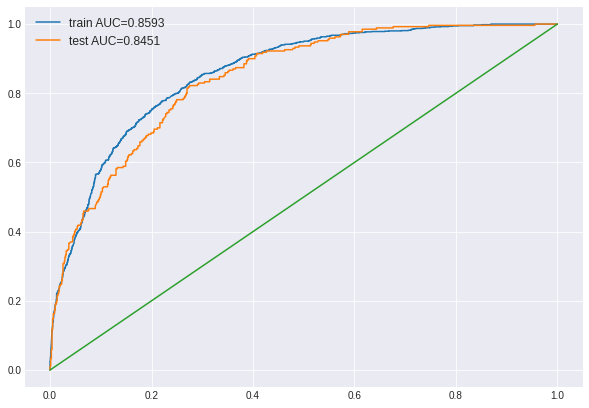

In [ ]:
# определим roc_auc_score 
roc_auc_print(y_train, y_train_predicted_cat_CV, y_test, y_test_predicted_cat_CV)

Лучшее качество для тестовой выборки получилось roc_auc = 0.8451

Наилучшая модель catboost имеет следующие параметры: 
1. depth = 2
2. learning_rate = 0.1
3. 'n_estimators = 200

# Предсказания

In [ ]:
best_model = CV_model_cat

In [ ]:
X_test = pd.read_csv('/content/drive/MyDrive/MFTI_Kaggle/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/MFTI_Kaggle/submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('/content/drive/MyDrive/MFTI_Kaggle/my_submission.csv', index=False)

**Результат на Kaggle получился 0.85349.**

**На Kaggle - Andrey Shcherbinin**

https://www.kaggle.com/c/advanced-dls-spring-2021/leaderboard

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.